In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams

rcParams['figure.figsize'] = (20, 5)

In [3]:
elec_ts = pd.read_csv('Datasets/Electric_Production.csv', header= 0, index_col=0)
elec_ts.columns = ['Units']

In [4]:
elec_ts.head()

,Units
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [5]:
elec_ts.shape

(397, 1)

### Moving Average Method`

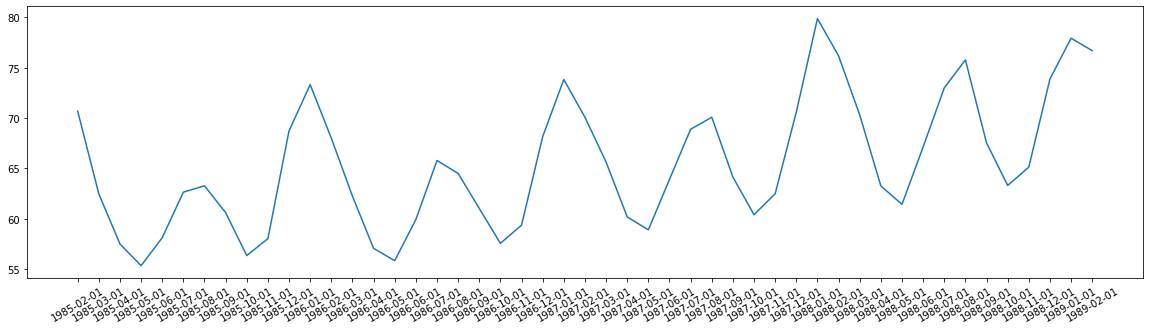

In [6]:
plt.plot(elec_ts[1:50]['Units'])
plt.xticks(rotation=30)
plt.show()

In [7]:
# Rolling average transform
rollingseries = elec_ts[1:50].rolling(window=5)

rollingmean = rollingseries.mean()

print(rollingmean.head())

               Units
DATE                
1985-02-01       NaN
1985-03-01       NaN
1985-04-01       NaN
1985-05-01       NaN
1985-06-01  60.79982


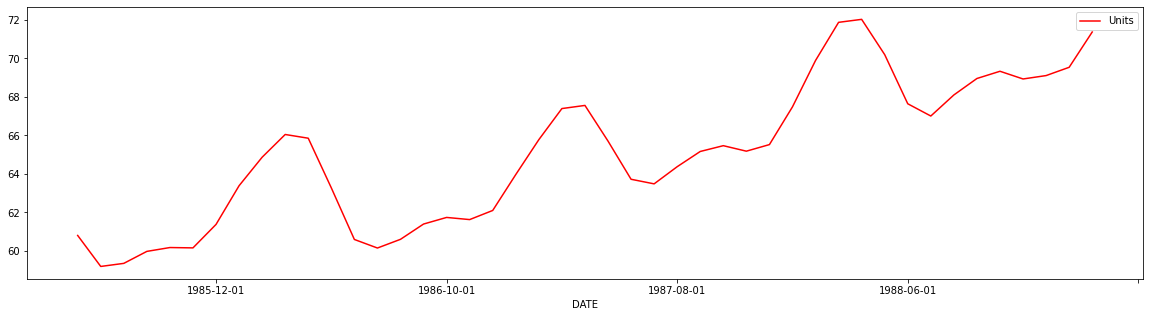

In [8]:
rollingmean.plot(color='red')
plt.show()

### Simple Exponential Smoothing

In [9]:
data = elec_ts[1:50]

fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)

fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8, optimized=False)

C:\Users\Anubhav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Anubhav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


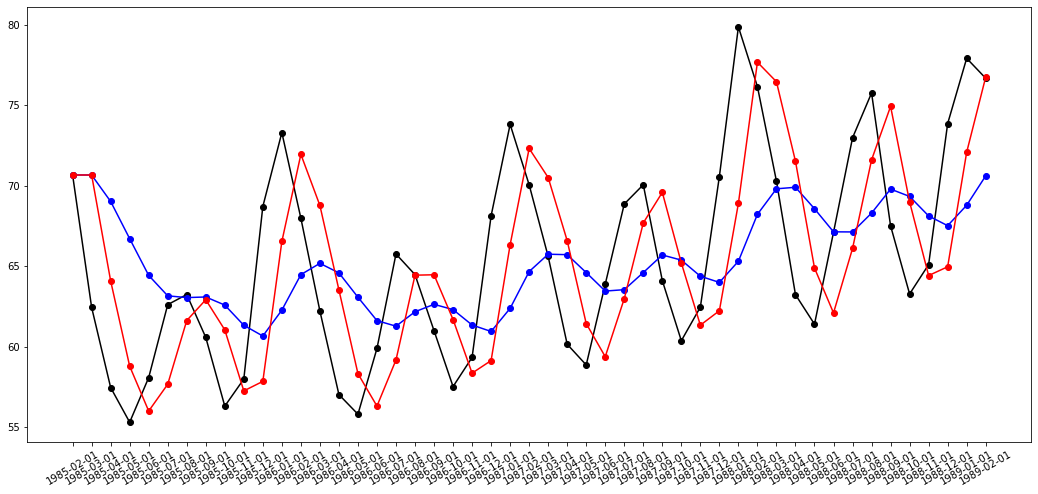

In [10]:
plt.figure(figsize= (18, 8))
plt.plot(elec_ts[1:50], marker='o', color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues, marker='o', color='blue')

plt.plot(fit2.fittedvalues, marker='o', color='red')